In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

In [101]:
df = pd.read_csv('./ml_source_files/College_Data', index_col=0)
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [102]:
df.Private.value_counts()

Yes    565
No     212
Name: Private, dtype: int64

In [103]:
df1 = df.drop('Private', axis=1)

C:\Users\bitcamp\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


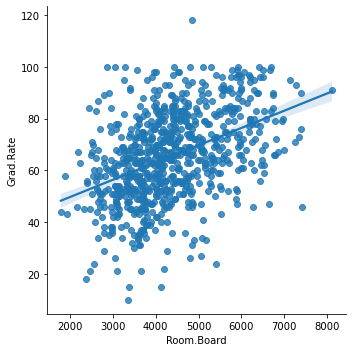

In [104]:
sns.lmplot('Room.Board','Grad.Rate', data = df1)

In [105]:
from sklearn.cluster import KMeans

In [106]:
k = KMeans(n_clusters=2)

In [107]:
k.fit(df1)

KMeans(n_clusters=2)

In [108]:
cluster_labels = k.labels_

In [109]:
k.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

In [98]:
def converter(s):
    if s == 'Yes':
        return 1
    else:
        return 0

In [99]:
private_value = df['Private'].apply(converter).values

In [110]:
np.mean(private_value == cluster_labels)

0.22136422136422138

TypeError: 'KMeans' object is not subscriptable

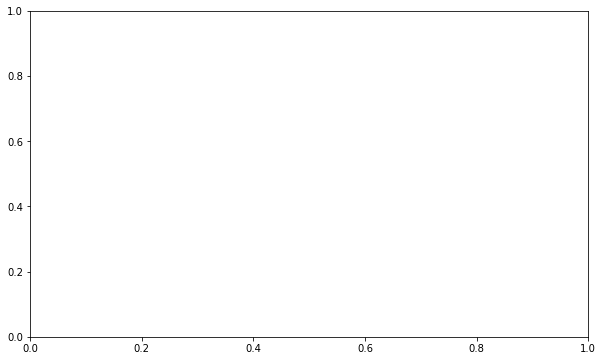

In [43]:
# plt.scatter(k[0][:,0], k[0][:,1], c = k.labels_, cmap='rainbow')  

f, ax = plt.subplots(1, sharey=True, figsize=(10,6))
ax.scatter(k[0][:,0], k[0][:,1], c=k.labels_, cmap='rainbow')